Build a regression model.

Before building the model I want to better classify the POI 

In [2]:
%store -r bike_station_information_df
%store -r yelp_result_df
%store -r fourSquare_result_df
%store -r final_df

final_df = final_df
import pandas as pd
import numpy as np

In [3]:

# Data Audit
# 1. Check for Missing Values
missing_values = final_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# 2. Check for Duplicates
duplicates = final_df.duplicated()
print("\nDuplicate Rows:")
print(final_df[duplicates])

# 3. Explore Data Types
data_types = final_df.dtypes
print("\nData Types:")
print(data_types)

# 4. Explore Unique Values
unique_values = final_df.nunique()
print("\nNumber of Unique Values:")
print(unique_values)

# 5. Check for Outliers (Assuming 'Rating' is a numerical column)
outliers = final_df.describe()
print("\nDescriptive Statistics:")
print(outliers)

Missing Values:
City                 0
Latitude             0
Longitude            0
Number of Bikes      0
Key                  0
Name                 0
Category             0
Distance             0
Rating             440
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [City, Latitude, Longitude, Number of Bikes, Key, Name, Category, Distance, Rating]
Index: []

Data Types:
City                object
Latitude           float64
Longitude          float64
Number of Bikes      int64
Key                  int64
Name                object
Category            object
Distance           float64
Rating             float64
dtype: object

Number of Unique Values:
City                 1
Latitude            44
Longitude           44
Number of Bikes     14
Key                 44
Name               359
Category           164
Distance           736
Rating               9
dtype: int64

Descriptive Statistics:
         Latitude   Longitude  Number of Bikes         Key      Distance  \
count  849.

In [8]:
# Handling Missing Values
# 1. Fill NaN values in the 'Rating' column with the mean
final_df['Rating'].fillna(final_df['Rating'].mean(), inplace=True)
final_df['Rating'] = final_df['Rating'].round(2)


/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


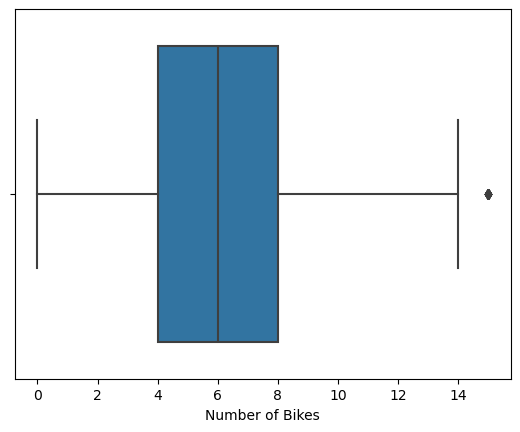

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Box plot for 'Number of Bikes'
sns.boxplot(x=final_df['Number of Bikes'])
plt.show()

In [47]:


  
def categorize(category):
  # Restaurants
  if any(keyword in category for keyword in ['Bakery', 'Restaurant', 'French', 'Japanese', 'Pizza', 'Indian', 'Pan Asian', 'Moroccan', 'Thai', 'Bistros', 'Pizzeria', 'Burger Joint', 'Steakhouses', 'Italian', 'Seafood', 'Mexican', 'Chinese', 'Fast Food']):
    return 'Restaurant'
  
  # Bars and Lounges
  elif any(keyword in category for keyword in ['Bar', 'Pub', 'Lounge']):
    return 'Bar/Lounge'
  
  # Health Centers
  elif any(keyword in category for keyword in ['Hospital', 'Health', 'Drugstore']):
    return 'Health Center'
  
  # Retails
  elif any(keyword in category for keyword in ['Computers and Electronics Retail', 'Store', 'Shop', 'Retail', 'Bookstore', 'Botanical Gardens']):
    return 'Retail'
  
  # Education
  elif any(keyword in category for keyword in ['School', 'Education', 'Library']):
    return 'Education'
  
  # Entertainment
  elif any(keyword in category for keyword in ['Music Venue', 'Theater', 'Cinema', 'Arts and Entertainment', 'Paintball Field']):
    return 'Entertainment'
  
  # Home Services
  elif any(keyword in category for keyword in ['Carpenter', 'Home Improvement Service', 'Electrician', 'Plumber', 'Interior Designer', 'Roof Deck', 'Heating, Ventilating and Air Conditioning Contractor']):
    return 'Home Services'
  
  # Landmarks and Historical Buildings
  elif any(keyword in category for keyword in ['Monument', 'Scenic Lookout', 'Park', 'Landmarks & Historical Buildings', 'Lakes']):
    return 'Landmarks & Historical Buildings'
  
  # Business and Professional Services
  elif any(keyword in category for keyword in ['Management Consultant', 'Business and Professional Services', 'Employment Agency', 'Organization', 'Professional Cleaning Service', 'Accounting and Bookkeeping Service']):
    return 'Business Services'
  
  # Other Services
  elif any(keyword in category for keyword in ['Computer Repair Service', 'Audiovisual Service', 'Post Office', 'Utility Company']):
    return 'Other Services'
  
  elif 'N/A' in category:
    return 'N/A'
  
  # Miscellaneous
  else:
    return 'Miscellaneous'


final_df['GroupedCategory'] = final_df['Category'].apply(categorize)

# Checking for all unique values in the 'grouped Category' column
unique_new_categories = final_df['GroupedCategory'].unique()
print(unique_new_categories)


final_df[final_df['Key'] == 0]

['Education' 'Retail' 'Restaurant' 'N/A' 'Health Center' 'Bar/Lounge'
 'Other Services' 'Miscellaneous' 'Landmarks & Historical Buildings'
 'Business Services' 'Home Services' 'Entertainment']


,City,Latitude,Longitude,Number of Bikes,Key,Name,Category,Distance,Rating,GroupedCategory
0,Cergy,49.034625,2.067596,12,0,Ecole de biologie industrielle,Education,259.000000,NaN,Education
1,Cergy,49.034625,2.067596,12,0,Esprit Clean,Fashion Accessories Store,283.000000,NaN,Retail
2,Cergy,49.034625,2.067596,12,0,Le Millésime du Port,French Restaurant,634.000000,NaN,Restaurant
3,Cergy,49.034625,2.067596,12,0,La Taverne des Rois,Restaurant,648.000000,NaN,Restaurant
4,Cergy,49.034625,2.067596,12,0,Au Fourmont Village,Bakery,359.000000,NaN,Restaurant
5,Cergy,49.034625,2.067596,12,0,Moulin Vert Lava'9,N/A,391.000000,NaN,N/A
6,Cergy,49.034625,2.067596,12,0,SAN MARINA Cergy,N/A,394.000000,NaN,N/A
7,Cergy,49.034625,2.067596,12,0,École Maternelle Publique le Village,Elementary School,397.000000,NaN,Education
8,Cergy,49.034625,2.067596,12,0,France Depannage Auto,Miscellaneous Store,425.000000,NaN,Retail
9,Cergy,49.034625,2.067596,12,0,Pharmacie des Trois Gares,Drugstore,448.000000,NaN,Health Center


In [46]:
import pandas as pd

# Creating a new dataframe using information from the combined dataframe (final_df)
grouped_df = pd.pivot_table(final_df, 
                            index=['Key', 'Number of Bikes', 'Latitude', 'Longitude'],
                            columns='GroupedCategory', 
                            values='Category', 
                            aggfunc='count', 
                            fill_value=0).reset_index()
grouped_df.columns.name = None

grouped_df

,Key,Number of Bikes,Latitude,Longitude,Bar/Lounge,Business Services,Education,Entertainment,Health Center,Home Services,Landmarks & Historical Buildings,Miscellaneous,N/A,Other Services,Restaurant,Retail
0,0,12,49.034625,2.067596,1,0,2,0,1,0,0,0,2,0,12,2
1,1,0,49.036320,2.079568,6,0,0,0,0,0,0,2,0,1,6,5
2,2,4,49.017697,2.099417,0,0,3,0,1,0,0,5,0,1,6,3
3,3,8,49.044092,2.036546,0,1,1,0,0,1,4,7,0,2,4,0
4,4,14,49.030665,2.083067,3,2,3,0,0,0,0,6,0,0,6,0
5,5,12,49.035511,2.061921,0,0,1,0,1,0,0,1,1,0,12,4
6,6,4,49.052785,2.017956,0,0,1,0,1,1,0,6,0,0,8,3
7,7,10,49.038058,2.070534,4,1,0,1,0,0,0,1,1,0,11,1
8,8,6,49.044395,2.090632,2,0,2,2,1,0,0,8,0,0,5,0
9,9,2,49.038874,2.076405,5,1,0,0,0,0,0,3,0,0,5,6


Provide model output and an interpretation of the results. 

In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = grouped_df[['Latitude', 'Longitude', 'Bar/Lounge', 'Business Services', 'Education', 'Entertainment',
        'Health Center', 'Home Services', 'Landmarks & Historical Buildings', 'Miscellaneous', 'N/A',
        'Other Services', 'Restaurant', 'Retail']]
y = grouped_df['Number of Bikes']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1.494
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.175
Time:                        23:10:12   Log-Likelihood:                -103.92
No. Observations:                  44   AIC:                             237.8
Df Residuals:                      29   BIC:                             264.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

The R-squared value of 0.419 indicates that the model explains 41.9% of the variability in the Number of Bikes. However, the lower Adjusted R-squared value (0.139) suggests that not all included variables are contributing significantly to the model.

Among the independent varaibles, only Longitude, Landmarks and Historical buildings and restaurant have a P value less than 0.05 which would suggest that these variables may have a statistically significant relationship with the Number of Bikes. Variables with p-values greater than 0.05 may not be contributing significantly and could be considered for removal from the model. 

The latitude and longitude seem to have the highest coefficient value which would suggest they have an higher impact on the number of bikes 

# Stretch

How can you turn the regression model into a classification model?